Feedforward and backward
---


In [274]:
import numpy as np
import pandas as pd

#import matplotlib.pyplot as plt
#import seaborn as sns

#sns.set_style("darkgrid")
#%matplotlib inline

In [275]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",names=['sepal_length','sepal_width','petal_length','petal_width','result'], header=None)
df = df.iloc[[1, 51, 101]]
df

,sepal_length,sepal_width,petal_length,petal_width,result
1,4.9,3.0,1.4,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica


Data preparation:
---

In [277]:
# one-hot encoding
y = pd.get_dummies(df.result).values

N = y.size

x = df.drop(["result"], axis=1).values

print("Shape of the output value: \n\n",y.shape)
print("\nOne hot encoding Output\n\n ",y)

print("\n\n Size of N",N)

print("\n Labeled Feature",x)

Shape of the output value: 

 (3, 3)

One hot encoding Output

  [[1 0 0]
 [0 1 0]
 [0 0 1]]


 Size of N 9

 Labeled Feature [[4.9 3.  1.4 0.2]
 [6.4 3.2 4.5 1.5]
 [5.8 2.7 5.1 1.9]]


Activation Function:
---

In [278]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


Hyperparameters:
---


In [279]:
learning_rate = 0.1
n_input = 4
n_hidden = 2
n_output = 3

In [280]:
np.random.seed(10)

weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)
print(weights_1)
print("")
print(weights_2)

[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]

[[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


Feedforward:
---

In [281]:
#Feedforward and Backpropagation
#In [7]:
# feedforward
hidden_layer_inputs = np.dot(x, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)


Backpropagation:
---

In [282]:
output_layer_error = output_layer_outputs - y
# backpropagation: here we can calculate the error on output layer and also on the hidden layer.
output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)
# T show the transpose of weights and inputs as per used with any term
hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

Weights updated:
---

In [283]:
# weight updates w r t MSE
weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
weights_1_update = np.dot(x.T, hidden_layer_delta) / N

#update w r t Gradient decent apporach
# this is single step that is used to update the parameter but we need to do more steps the can give result a very close value to zero or small value.
weights_2 = weights_2 - learning_rate * weights_2_update
weights_1 = weights_1 - learning_rate * weights_1_update
print(weights_2)
print("")
print(weights_1)

[[-1.29660239e-04 -8.76520240e-02  2.14566926e-01]
 [ 6.00302339e-01 -4.82892185e-01  5.12326972e-01]]

[[ 0.66553432  0.3543703 ]
 [-0.77285398 -0.00580523]
 [ 0.31057873 -0.36241503]
 [ 0.13273866  0.05347525]]


Mean Saqure Error before weight update:
---

In [284]:
mse = ((output_layer_outputs - y)**2).sum() / (2*N)
mse

0.13831126800831411

Mean Saqure Error after updated weights:
---

In [285]:
#MSE after weights are updated
# after updated weight we can predict the model again and check the mse if it reduced then it will work
# feedforward
hidden_layer_inputs = np.dot(x, weights_1)
hidden_layer_outputs = sigmoid(hidden_layer_inputs)

output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
output_layer_outputs = sigmoid(output_layer_inputs)

mse = ((output_layer_outputs - y)**2).sum() / (2*N)
mse

0.1379749216970851

In [286]:
#Helper Functions¶

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
    accuracy = predicions_correct.mean()
    
    return accuracy

In [290]:
# this is based on iteration (epoch)
#1. Training Attempt
# hyperparameters
learning_rate = 0.1
epochs = 1000

n_input = 4
n_hidden = 2
n_output = 3

np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   # (4, 2)
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  # (2, 3)

# training the neural net
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y)
    acc = accuracy(output_layer_outputs, y)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)
monitoring_df.head(1000)


,mean_squared_error,accuracy
0,0.138311,0.333333
1,0.137975,0.333333
2,0.137638,0.333333
3,0.137302,0.333333
4,0.136966,0.333333
...,...,...
995,0.095202,0.666667
996,0.095177,0.666667
997,0.095152,0.666667
998,0.095127,0.666667


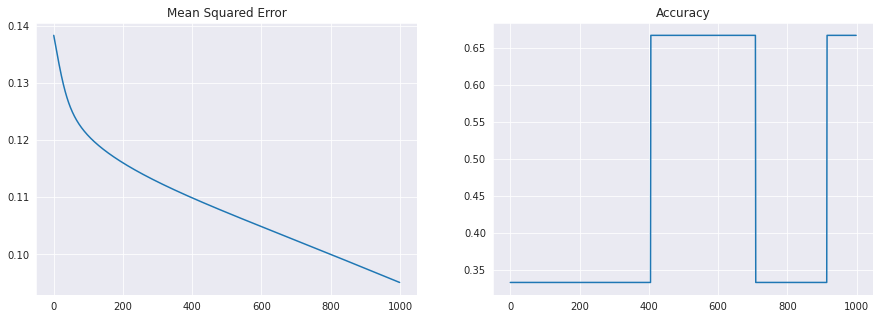

In [291]:
# this is showing the graph of MSE and the Accuracy
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy");

Result of 1 epoch:
---
According the mse output it shown the small level of update in the loss function but we will need to more minimum that predict more accurately.

We need the MSE zero or close to the zero so this can be give the correct prediction according to the given feature and the NN parameters

Gradient Decent:
---


In [267]:
def f(x):
    return x**2

def f_prime(x):
    return 2 * x
x = np.arange(-10, 10.01, 0.01)
df = pd.DataFrame({"y": f(x)}, index=x)

In [ ]:
 # gradient descent steps
starting_x=mse_output
n_gradient_descent_steps =10
learning_rate=0.02

steps = [starting_x]
for step in range(n_gradient_descent_steps):
  current_step = steps[-1]
  next_step = current_step - learning_rate * f_prime(current_step)
  steps.append(next_step)

steps = np.array(steps)
last_step = round(steps[-1], ndigits=2)
df_gradient_descent = pd.DataFrame({"y": f(steps)})
df_gradient_descent

In [269]:
steps

array([0.13797492, 0.13245592, 0.12715769, 0.12207138, 0.11718853,
       0.11250098, 0.10800094, 0.10368091, 0.09953367, 0.09555232,
       0.09173023])

In [ ]:
def plot_gradient_descent(starting_x, learning_rate, n_gradient_descent_steps):

    # gradient descent steps
    steps = [starting_x]
    for step in range(n_gradient_descent_steps):
        current_step = steps[-1]
        next_step = current_step - learning_rate * f_prime(current_step)
        steps.append(next_step)

    steps = np.array(steps)
    last_step = round(steps[-1], ndigits=2)
    df_gradient_descent = pd.DataFrame({"y": f(steps)})

    # plots
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    plot_1, plot_2 = axes

    df.plot(legend=False, ax=plot_1)
    plot_1.plot(steps, f(steps), linestyle='--', marker='o', color='k')
    plot_1.set_xlabel("x")
    plot_1.set_ylabel("f(x)")
    plot_1.set_title("f(x) = x²", fontsize=16)
    plot_1.annotate("learning rate = {}".format(learning_rate), (-2, 90), fontsize=14)
    plot_1.annotate(f"Value of x at the last step: {last_step}", (-4, 85), fontsize=14)

    df_gradient_descent.plot(legend=False, ax=plot_2)
    plot_2.set_ylabel("f(x)")
    plot_2.set_xlabel("Gradient Descent Step")
    plot_2.set_title("f(x) based on Gradient Descent Steps", fontsize=16)
    plot_2.annotate("learning rate = {}".format(learning_rate), (len(steps) / 2, f(steps[1])), fontsize=14)
    
    return

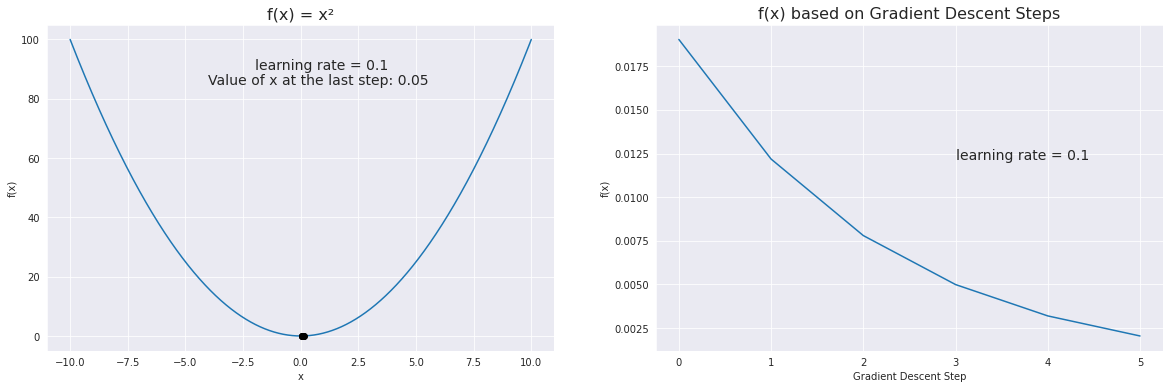

In [ ]:
plot_gradient_descent(mse_output, learning_rate=0.1, n_gradient_descent_steps=5)
